In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Exploring the data

In [86]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [87]:
df.shape

(200, 5)

In [88]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [90]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [91]:
df.isnull().sum().sum() # No null values

0

In [92]:
df.duplicated().sum() # No duplicated values

0

In [93]:
# Replacing Male >> 1 AND Female >> 0
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Choosing the Annual Income Column & Spending Score column

In [94]:
X = df.loc[:, ['Annual_Income', 'Spending_Score']]
X.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [95]:
# Finding the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Curve')

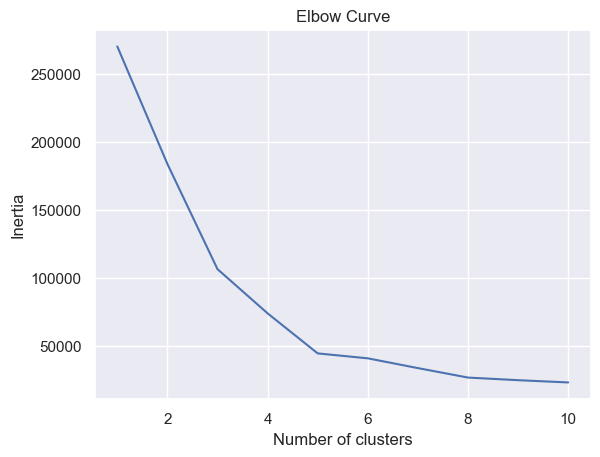

In [96]:
# Plot the elbow curve
sns.set()
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')

# Optimum Number of Clusters = 5

In [97]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
y = kmeans.fit_predict(X)

In [98]:
print(y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


# Plotting all the 5-clusters and their Centroids

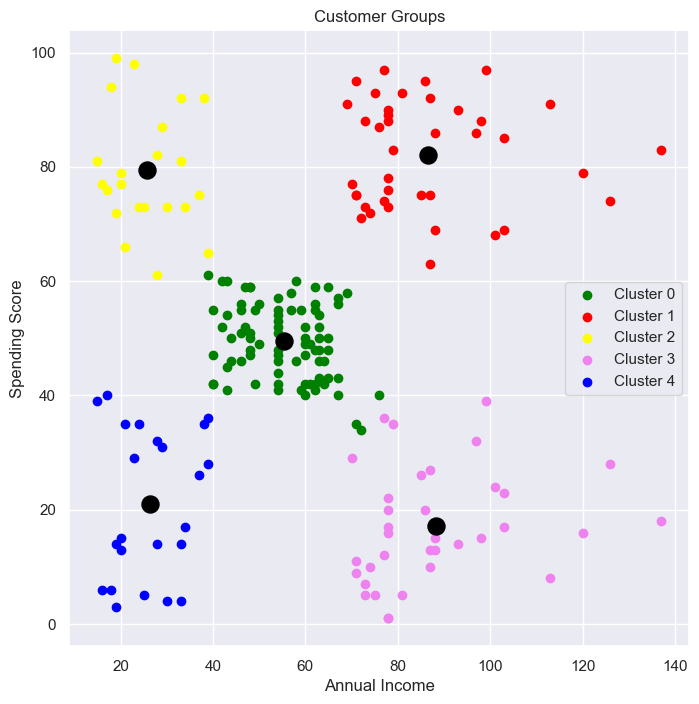

In [99]:
plt.figure(figsize=(8, 8))
plt.scatter(X[y==0]['Annual_Income'], X[y==0]['Spending_Score'],label='Cluster 0', c='green')
plt.scatter(X[y==1]['Annual_Income'], X[y==1]['Spending_Score'],label='Cluster 1', c='red')
plt.scatter(X[y==2]['Annual_Income'], X[y==2]['Spending_Score'],label='Cluster 2', c='yellow')
plt.scatter(X[y==3]['Annual_Income'], X[y==3]['Spending_Score'],label='Cluster 3', c='violet')
plt.scatter(X[y==4]['Annual_Income'], X[y==4]['Spending_Score'],label='Cluster 4', c='blue')

# Plot the centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=150)

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()